In [1]:
!python --version


Python 3.11.7


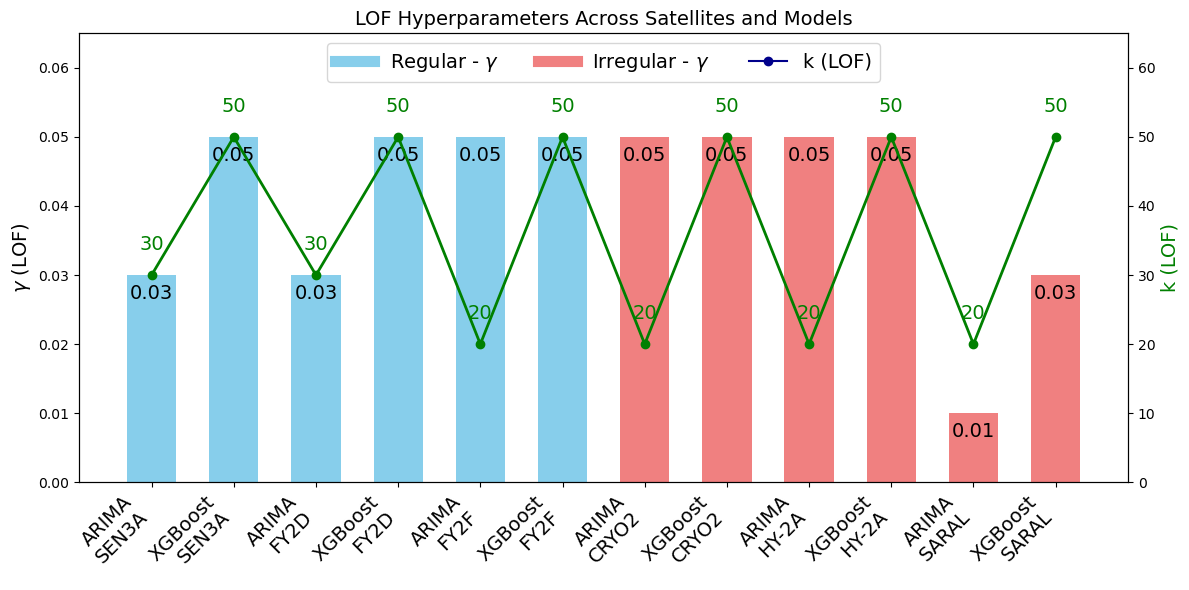

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data
satellites = ["SEN3A", "FY2D", "FY2F", "CRYO2", "HY-2A", "SARAL"]
manoeuvre_types = ["Regular", "Regular", "Regular", "Irregular", "Irregular", "Irregular"]

# Flattened x-axis labels and colors
labels = []
colors = []
for sat, mtype in zip(satellites, manoeuvre_types):
    labels.append(f"ARIMA\n{sat}")
    labels.append(f"XGBoost\n{sat}")
    if mtype == "Regular":
        colors.append("skyblue")
        colors.append("skyblue")
    else:
        colors.append("lightcoral")
        colors.append("lightcoral")

# Values for k and gamma
k_values = [30, 50, 30, 50, 20, 50, 20, 50, 20, 50, 20, 50]
gamma_values = [0.03, 0.05, 0.03, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.01, 0.03]

# Create plot
x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for gamma
bars = ax1.bar(x, gamma_values, color=colors, width=0.6, label=r'$\gamma$ (LOF)')
ax1.set_ylabel(r'$\gamma$ (LOF)', fontsize=14)
ax1.set_ylim(0, 0.065)  # 给 gamma 更大一点空间
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)

# Add value labels for bars
for bar, gamma in zip(bars, gamma_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height - 0.004, f'{gamma:.2f}',
             ha='center', va='bottom', fontsize=14)

# Second y-axis for k
ax2 = ax1.twinx()
k_line, = ax2.plot(x, k_values, color='green', marker='o', linewidth=2, label='k (LOF)')
ax2.set_ylabel('k (LOF)', fontsize=14, color="green")
ax2.set_ylim(0, 65)  # 给 k 也留空间

# Add value labels for line points
for xi, ki in zip(x, k_values):
    ax2.text(xi, ki + 3, f'{ki}', ha='center', va='bottom', fontsize=14, color="green")  # +3，避免压在 bar 上

# Create legend proxies
bars_proxy_regular = plt.Line2D([0], [0], color='skyblue', lw=8)
bars_proxy_irregular = plt.Line2D([0], [0], color='lightcoral', lw=8)
line_proxy_k = plt.Line2D([0], [0], color='darkblue', marker='o', linestyle='-')

# Add legend
plt.legend([bars_proxy_regular, bars_proxy_irregular, line_proxy_k],
           ['Regular - $\gamma$', 'Irregular - $\gamma$', 'k (LOF)'],
           loc='upper center', ncol=3, fontsize=14)

# Title and layout
plt.title('LOF Hyperparameters Across Satellites and Models', fontsize=14)
plt.tight_layout()
plt.show()
